## $$ Machine Learning For Data Science $$
## $$ Assignment -1 $$
$$ M.Srinija $$
$$ 2211CS030103 $$
$$ DS - Beta $$

# Task 1: Implement Simple Supervised Learning Model

### Objective: Implement a Linear Regression model to predict house prices based on a dataset containing features like square footage, number of bedrooms, and location.

In [1]:
# Importing necessary Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

####  Step - 1	Load a dataset (e.g., Boston Housing dataset or any suitable housing dataset).
We'll start by loading a The Hyderbad dataset

In [2]:
# Load the dataset
data = pd.read_csv("Hyderabad.csv")
# Initial data check
data.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


#### Step - 2 Perform Exploratory Data Analysis (EDA) to understand the dataset.
Exploratory Data Analysis (EDA) is a way to analyze data sets to understand their main characteristics and identify patterns and anomalies. It's often the first step in data analysis and helps you prepare your data for more advanced techniques.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                2518 non-null   int64 
 1   Area                 2518 non-null   int64 
 2   Location             2518 non-null   object
 3   No. of Bedrooms      2518 non-null   int64 
 4   Resale               2518 non-null   int64 
 5   MaintenanceStaff     2518 non-null   int64 
 6   Gymnasium            2518 non-null   int64 
 7   SwimmingPool         2518 non-null   int64 
 8   LandscapedGardens    2518 non-null   int64 
 9   JoggingTrack         2518 non-null   int64 
 10  RainWaterHarvesting  2518 non-null   int64 
 11  IndoorGames          2518 non-null   int64 
 12  ShoppingMall         2518 non-null   int64 
 13  Intercom             2518 non-null   int64 
 14  SportsFacility       2518 non-null   int64 
 15  ATM                  2518 non-null   int64 
 16  ClubHo

In [4]:
data.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,2.518000e+03,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,...,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,9.818380e+06,1644.571088,2.623511,0.227562,0.412629,0.739873,0.709690,0.619142,0.559968,0.606434,...,0.975774,0.360207,0.607228,0.342732,0.330024,0.321287,0.334392,0.342335,0.341144,0.324861
std,8.777113e+06,746.256956,0.687330,0.419341,1.626445,1.611024,1.615231,1.624426,1.627686,1.625308,...,1.557725,1.622778,1.625256,1.621178,1.619894,1.618953,1.620347,1.621139,1.621023,1.619344
min,2.000000e+06,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.760000e+06,1160.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.754000e+06,1500.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.090000e+07,1829.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.650000e+08,9400.000000,8.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [5]:
data.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

<Figure size 400x200 with 0 Axes>

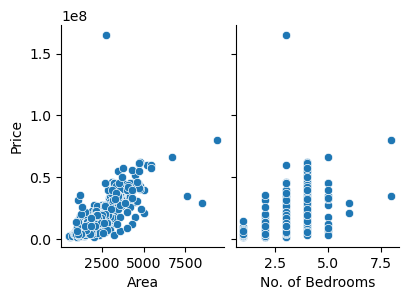

In [6]:
# Visualize data distribution
plt.figure(figsize=(4, 2))
sns.pairplot(data, x_vars=['Area', 'No. of Bedrooms'], y_vars='Price', height=3, aspect=0.7)
plt.show()

In [7]:
modified_data = data.drop(['Location','MaintenanceStaff','Resale', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens','JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall','Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School','24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter','Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine','Gasconnection', 'AC', 'Wifi', 'LiftAvailable','BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV','DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],axis=1)
modified_data = modified_data.drop("Children'splayarea",axis=1)

In [8]:
# Handle missing data (if any)
modified_data.isnull().sum()

Price              0
Area               0
No. of Bedrooms    0
dtype: int64

#### Step - 3 Handle any outliers you find in the dataset.

In [9]:
z_scores = np.abs(zscore(modified_data))
outliers = (z_scores>3).all(axis=1)
outliers_removed_data = modified_data[~outliers]

In [10]:
outliers_removed_data.dropna(inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_6352\2380543889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_removed_data.dropna(inplace=True)


#### Step - 4. Perform feature selection to choose the most relevant features for the model.

Feature selection is the process of identifying the most relevant features for your model. This can help improve the model's performance by reducing overfitting and speeding up the training process.

##### Correlation Matrix:
We compute the correlation between each feature and the target variable (house prices) and select those with the highest correlation.

In [11]:
correlation = data.corr(numeric_only=True)

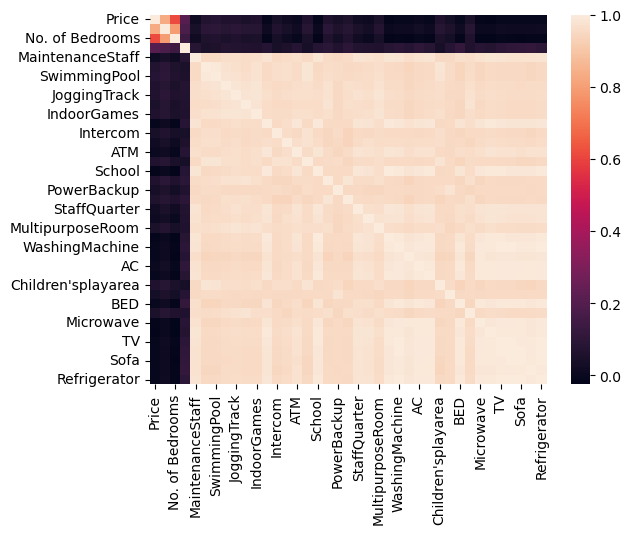

In [12]:
sns.heatmap(correlation)
plt.show()

In [13]:
# Select the most relevant features
features = correlation['Price'].sort_values(ascending=False)[:3].keys()
print(features)

Index(['Price', 'Area', 'No. of Bedrooms'], dtype='object')


In [14]:
relevant_featured_data = outliers_removed_data[features]

#### Step- 5 Normalize the features using Min-Max Normalization.

##### Min-max normalization:
Min-max normalization, also known as feature scaling, is a data normalization technique that rescales values to a fixed range, usually between 0 and 1. It's a linear transformation that ensures all features have the same scale, and preserves the relative order and distance of data points

In [15]:
scaler = MinMaxScaler()
scaler.fit(relevant_featured_data)

MinMaxScaler()

In [16]:
scaler.transform(relevant_featured_data)
data.dropna(inplace=True)

In [17]:
relevant_featured_data.head()

,Price,Area,No. of Bedrooms
0,6968000,1340,2
1,29000000,3498,4
2,6590000,1318,2
3,5739000,1295,3
4,5679000,1145,2


#### Step - 6 Split the data into training and testing sets.

The train-test split is a technique in machine learning where a dataset is divided into two subsets: the training set and test set. The training set is used to train the model, while the test set is used to evaluate the final model's performance and generalization capabilities.

In [18]:
x = relevant_featured_data.iloc[:,1:]
y = relevant_featured_data.iloc[:,0]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

#### Step- 7 Implement a Linear Regression model.

###### Linear Regression:
Linear Regression is a statistical method used to model the relationship between one dependent variable and one or more independent variables.

###### Simple Linear Regression:
In a simple linear regression, there is one independent variable and one dependent variable. The model estimates the slope and intercept of the line of best fit, which represents the relationship between the variables. The slope represents the change in the dependent variable for each unit change in the independent variable, while the intercept represents the predicted value of the dependent variable when the independent variable is zero. The equation for simple linear regression is $$y = \beta_0 + \beta_1 x $$

###### Multiple Linear Regression
Multiple linear regression is a technique to understand the relationship between a single dependent variable and multiple independent variables. The equation for multiple linear regression is $$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n$$

In [20]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred = model.predict(x_test)

In [22]:
y_input_test = pd.DataFrame({'Area':[1400],'No. of Bedrooms':[2]})
y_output_test = model.predict(y_input_test)
y_output_test

array([8187552.54441344])

#### Step - 8 Evaluate the model’s performance using metrics like Mean Squared Error (MSE) and R-squared.

###### Mean Squared Error (MSE)
MSE is the average of the squares of the differences between the actual values and the predicted values. 

**Formula:**

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

Where:
- \( y_i \) is the actual value.
- \( y^i\) is the predicted value.
- \( n \) is the number of data points.


######  R-squared (R²)
R-squared is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model.

**Formula:**

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

Where:
- \( y_i \) is the actual value.
- \( \hat{y}_i \) is the predicted value.
- \( \bar{y} \) is the mean of the actual values.


In [23]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(mse)
print(r2)

45003498167456.945
0.5068427943938139


# Task 2: Outlier Detection and Handling

### Objective: Implement a program to detect and handle outliers in a dataset.

In [24]:
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

#### Step - 1	Load a dataset with continuous numerical features (e.g., a dataset containing sales data, temperature readings, etc.).

We'll load the dataset that contains the Seasonal and Annual Mean Temperature Series from 1901 to 2021.

In [25]:
data = pd.read_csv("TEMP_ANNUAL_SEASONAL_MEAN.csv")
data.head()

,YEAR,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901.0,25.42,20.11,27.64,28.16,23.1
1,1902.0,25.42,20.88,27.96,27.98,22.51
2,1903.0,25.01,19.99,27.02,28,22.33
3,1904.0,24.93,19.76,27.23,27.57,22.56
4,1905.0,24.84,18.36,26.38,28.2,23.13


Performing EDA on data

In [26]:
cols = data.columns

In [27]:
data.dropna(inplace=True)

In [28]:
for col in cols:
    data[col] = data[col].astype(float)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 120
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     121 non-null    float64
 1   ANNUAL   121 non-null    float64
 2   JAN-FEB  121 non-null    float64
 3   MAR-MAY  121 non-null    float64
 4   JUN-SEP  121 non-null    float64
 5   OCT-DEC  121 non-null    float64
dtypes: float64(6)
memory usage: 6.6 KB


In [30]:
data.describe()

,YEAR,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,121.000000,121.00000,121.000000,121.000000,121.000000,121.000000
mean,1961.000000,25.30438,20.400083,27.477934,27.888678,22.955207
std,35.073732,0.31642,0.519935,0.465290,0.286115,0.460692
min,1901.000000,24.54000,18.360000,26.160000,27.220000,21.790000
25%,1931.000000,25.08000,20.090000,27.140000,27.700000,22.550000
50%,1961.000000,25.25000,20.410000,27.470000,27.880000,22.940000
75%,1991.000000,25.55000,20.750000,27.820000,28.050000,23.300000
max,2021.000000,26.20000,21.800000,28.890000,28.600000,24.080000


### Step - 2	Visualize the data to identify potential outliers using box plots and histograms.

###### Histograms:
A histogram is a graphical representation of the distribution of numerical data. It is created by dividing the data range into intervals, known as bins, and then counting the number of data points that fall into each bin.

###### Boxplots:
A boxplot is a graphical representation used in descriptive statistics to display the distribution of a dataset. A boxplot typically includes the following components:

- Minimum: The lowest data point, excluding outliers.
- First Quartile (Q1): The median of the lower half of the dataset, representing the 25th percentile.
- Median (Q2): The middle value of the dataset, representing the 50th percentile.
- Third Quartile (Q3): The median of the upper half of the dataset, representing the 75th percentile.
- Maximum: The highest data point, excluding outliers.

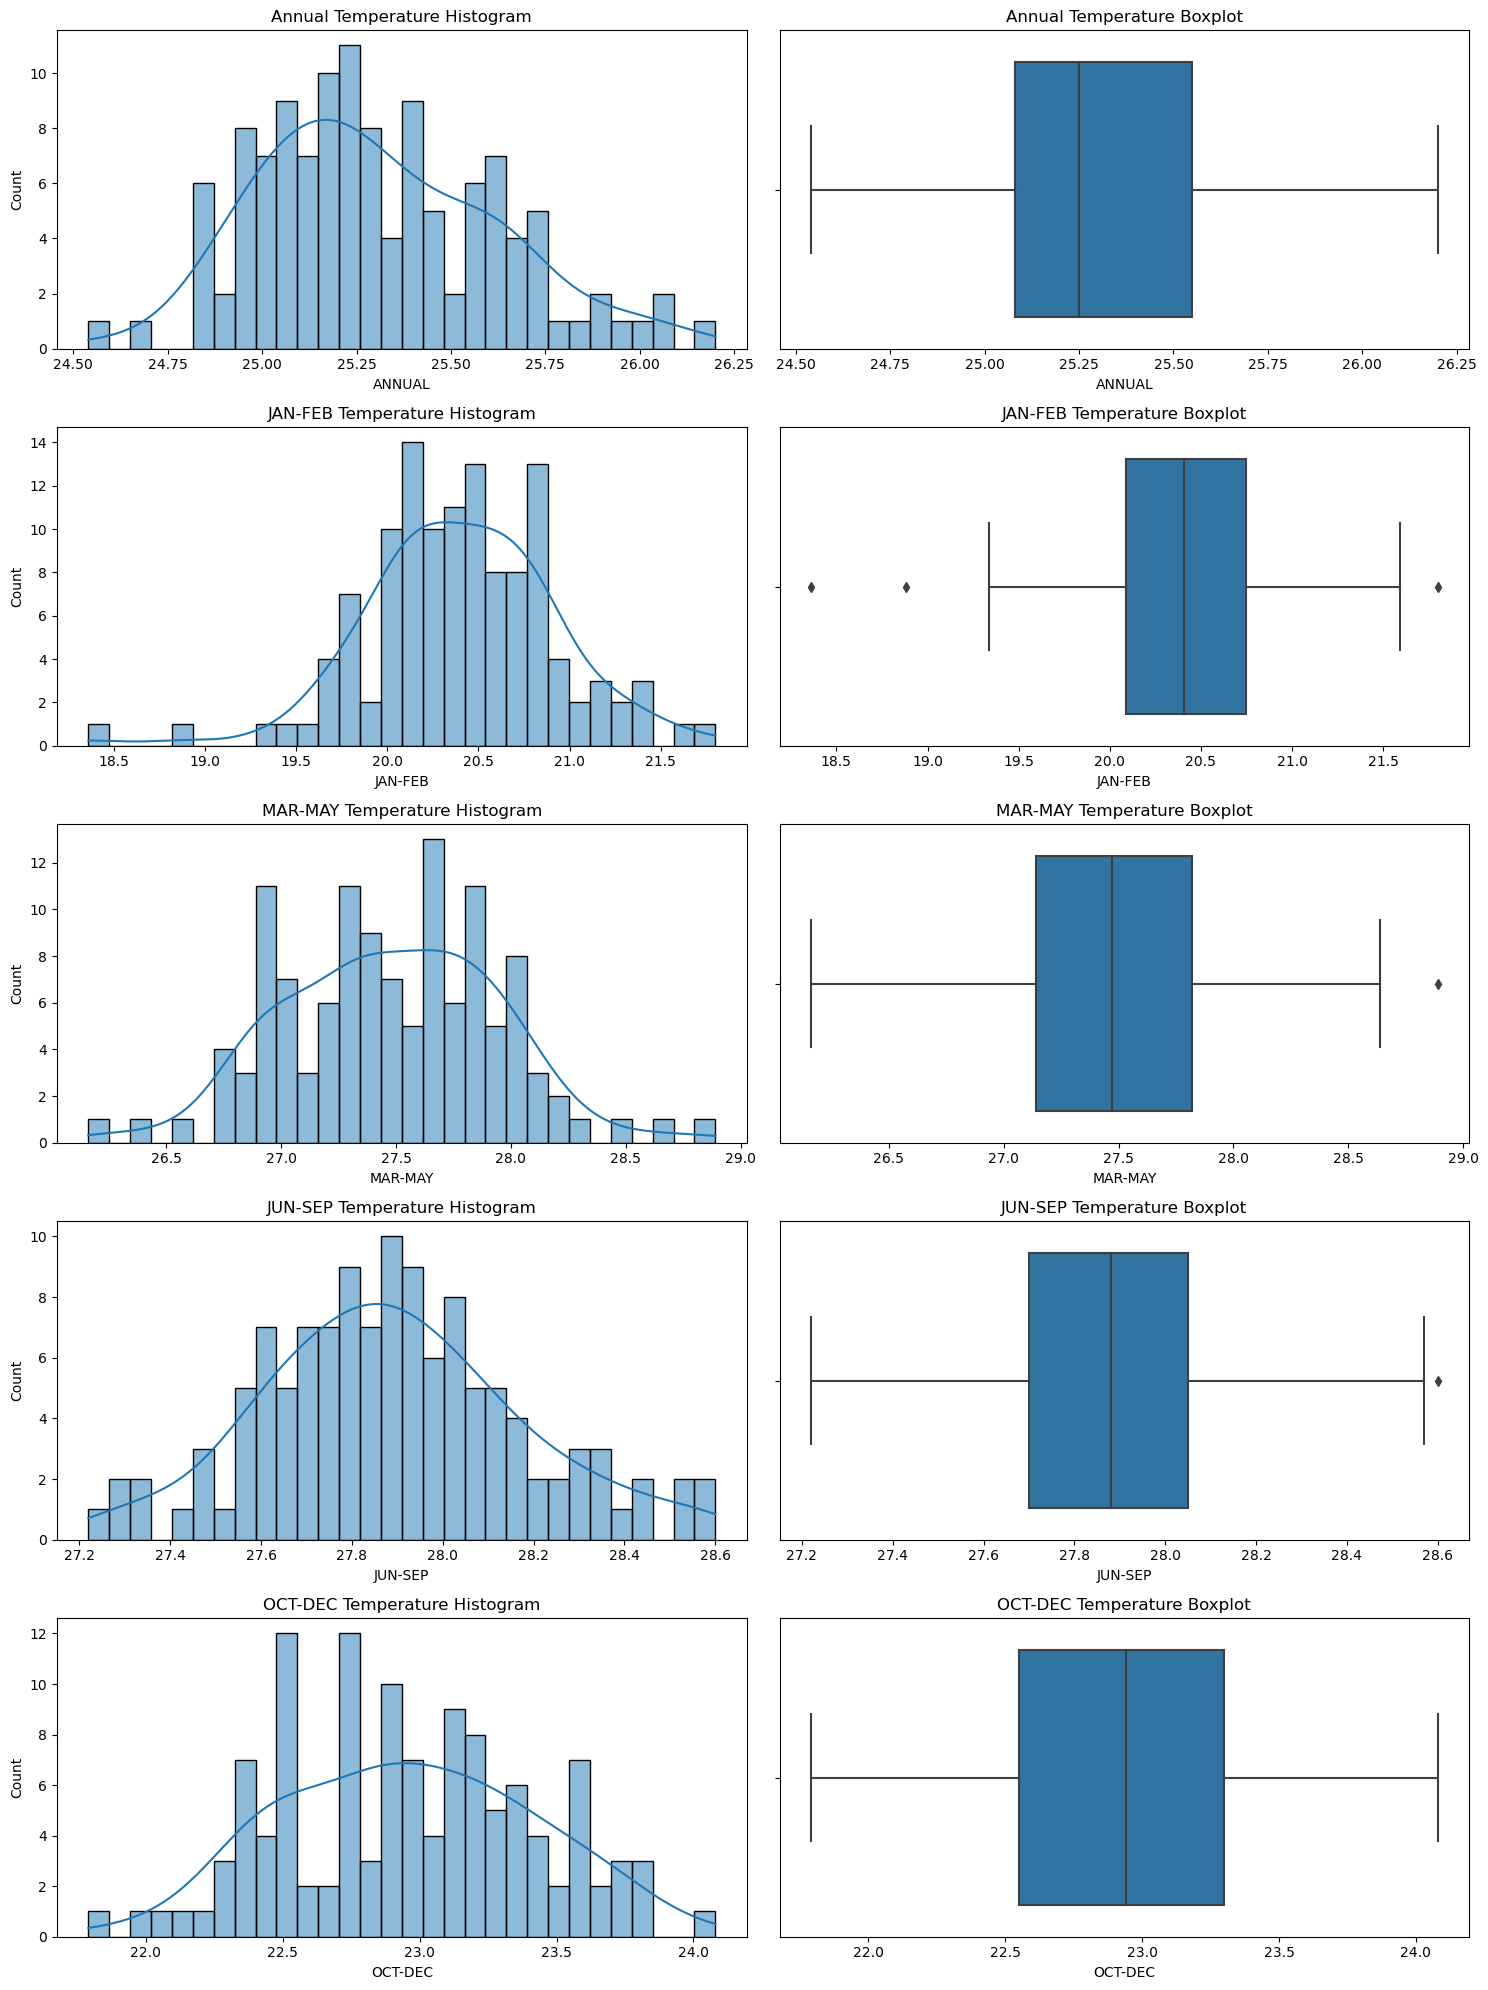

In [31]:
plt.figure(figsize=(15, 20))

plt.subplot(5, 2, 1)
sns.histplot(data['ANNUAL'], bins=30, kde=True)
plt.title('Annual Temperature Histogram')

plt.subplot(5,2,2)
sns.boxplot(x = data['ANNUAL'])
plt.title('Annual Temperature Boxplot')

plt.subplot(5, 2, 3)
sns.histplot(data['JAN-FEB'], bins=30, kde=True)
plt.title('JAN-FEB Temperature Histogram')

plt.subplot(5,2,4)
sns.boxplot(x = data['JAN-FEB'])
plt.title('JAN-FEB Temperature Boxplot')

plt.subplot(5, 2, 5)
sns.histplot(data['MAR-MAY'], bins=30, kde=True)
plt.title('MAR-MAY Temperature Histogram')

plt.subplot(5,2,6)
sns.boxplot(x = data['MAR-MAY'])
plt.title('MAR-MAY Temperature Boxplot')

plt.subplot(5, 2, 7)
sns.histplot(data['JUN-SEP'], bins=30, kde=True)
plt.title('JUN-SEP Temperature Histogram')

plt.subplot(5,2,8)
sns.boxplot(x = data['JUN-SEP'])
plt.title('JUN-SEP Temperature Boxplot')

plt.subplot(5, 2, 9)
sns.histplot(data['OCT-DEC'], bins=30, kde=True)
plt.title('OCT-DEC Temperature Histogram')

plt.subplot(5,2,10)
sns.boxplot(x = data['OCT-DEC'])
plt.title('OCT-DEC Temperature Boxplot')

plt.tight_layout() 
plt.show()

### Step- 3 	Implement the Z-Score method to detect outliers in one of the features.

Implement the Z-Score method to detect outliers in the Annual Temperature

A z-score, also known as a standard score, is a statistical measure that describes the position of a raw score in relation to the mean of a dataset, expressed in terms of standard deviations. The formula for calculating a z-score is:
$$ z = \frac{x−μ}{σ} $$
where:

- x is the raw score,
- μ is the mean of the dataset,
- σ is the standard deviation of the dataset

In [32]:
z_scores = abs(zscore(data['ANNUAL']))
outliers = z_scores>2
data[outliers]

,YEAR,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
16,1917.0,24.54,20.16,26.16,27.30,22.14
108,2009.0,26.05,21.59,28.12,28.55,23.61
109,2010.0,26.03,21.09,28.89,28.20,23.58
115,2016.0,26.20,21.80,28.64,28.35,23.84
116,2017.0,26.04,21.37,28.20,28.39,23.84


### Step - 4	Implement the IQR method to detect outliers in another feature.

We'll detect outliers in one of the MAR-MAY Temperature series using the Interquartile Range (IQR) method.

###### Interquartile Range (IQR):
The Interquartile Range (IQR) is a measure of statistical dispersion, which indicates the spread of the middle 50% of a dataset. It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1):
$$ IQR=Q3−Q1 $$

- First Quartile (Q1): The median of the lower half of the dataset, representing the 25th percentile.
- Third Quartile (Q3): The median of the upper half of the dataset, representing the 75th percentile.

The IQR is particularly useful because it is not affected by outliers or extreme values, making it a robust measure of variability. It helps in understanding the spread and central tendency of the data, and is often used in conjunction with boxplots to visualize the distribution

In [33]:
Q1 = data['MAR-MAY'].quantile(0.25)
Q3 = data['MAR-MAY'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR

In [34]:
outliers_IQR = data[(data['MAR-MAY']<lower_bound) | (data['MAR-MAY']>upper_bound)]
outliers_IQR

,YEAR,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
4,1905.0,24.84,18.36,26.38,28.20,23.13
16,1917.0,24.54,20.16,26.16,27.30,22.14
109,2010.0,26.03,21.09,28.89,28.20,23.58
115,2016.0,26.20,21.80,28.64,28.35,23.84


### Step - 5	Handle the outliers by either removing them, capping them, or transforming the data.

In [35]:
data = data[~outliers]
data.head()

,YEAR,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901.0,25.42,20.11,27.64,28.16,23.10
1,1902.0,25.42,20.88,27.96,27.98,22.51
2,1903.0,25.01,19.99,27.02,28.00,22.33
3,1904.0,24.93,19.76,27.23,27.57,22.56
4,1905.0,24.84,18.36,26.38,28.20,23.13


###### Outlier capping:
Outlier capping is a technique for handling outliers by setting a limit on the data, and then capping any values outside of that limit. For example, you can calculate an upper limit and lower limit, and then set any values above the upper limit to that limit, and any values below the lower limit to that limit

In [36]:
data['MAR-MAY'] = np.where(data['MAR-MAY']<lower_bound,lower_bound,data['MAR-MAY'])
data['MAR-MAY'] = np.where(data['MAR-MAY']>upper_bound,upper_bound,data['MAR-MAY'])

### Step - 6	Re-visualize the data to confirm that outliers have been appropriately handled.

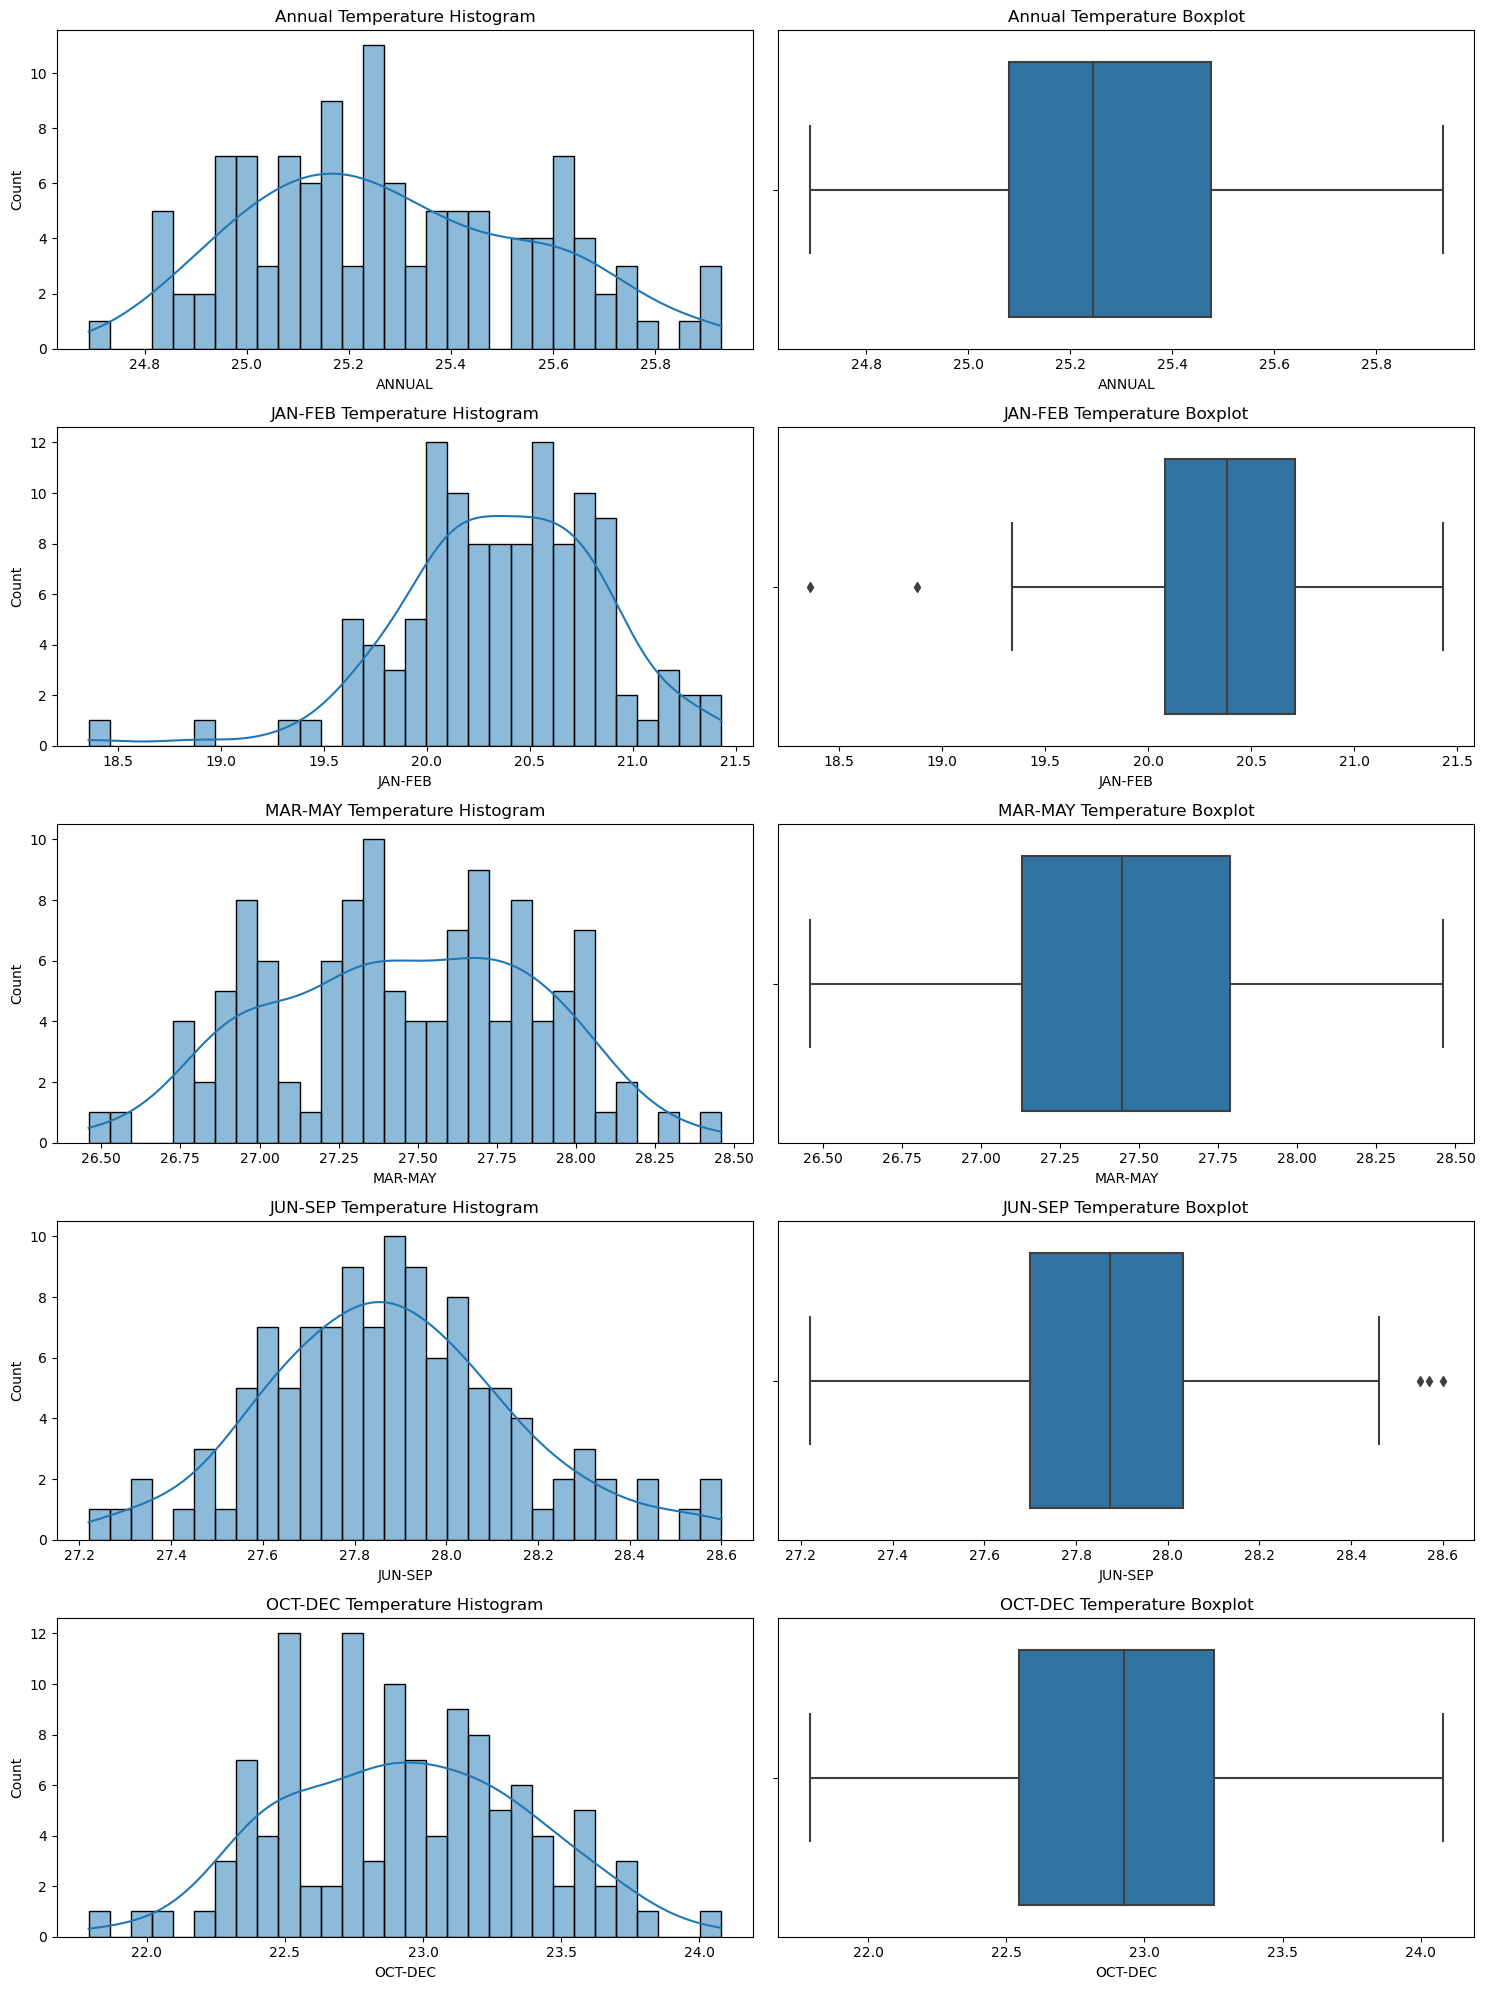

In [37]:
plt.figure(figsize=(15, 20))

plt.subplot(5, 2, 1)
sns.histplot(data['ANNUAL'], bins=30, kde=True)
plt.title('Annual Temperature Histogram')

plt.subplot(5,2,2)
sns.boxplot(x = data['ANNUAL'])
plt.title('Annual Temperature Boxplot')

plt.subplot(5, 2, 3)
sns.histplot(data['JAN-FEB'], bins=30, kde=True)
plt.title('JAN-FEB Temperature Histogram')

plt.subplot(5,2,4)
sns.boxplot(x = data['JAN-FEB'])
plt.title('JAN-FEB Temperature Boxplot')

plt.subplot(5, 2, 5)
sns.histplot(data['MAR-MAY'], bins=30, kde=True)
plt.title('MAR-MAY Temperature Histogram')

plt.subplot(5,2,6)
sns.boxplot(x = data['MAR-MAY'])
plt.title('MAR-MAY Temperature Boxplot')

plt.subplot(5, 2, 7)
sns.histplot(data['JUN-SEP'], bins=30, kde=True)
plt.title('JUN-SEP Temperature Histogram')

plt.subplot(5,2,8)
sns.boxplot(x = data['JUN-SEP'])
plt.title('JUN-SEP Temperature Boxplot')

plt.subplot(5, 2, 9)
sns.histplot(data['OCT-DEC'], bins=30, kde=True)
plt.title('OCT-DEC Temperature Histogram')

plt.subplot(5,2,10)
sns.boxplot(x = data['OCT-DEC'])
plt.title('OCT-DEC Temperature Boxplot')

plt.tight_layout() 
plt.show()

# Task 3: Feature Engineering - Feature Selection

### Objective: Implement feature selection methods to identify the most important features in a dataset.

In [38]:
# Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Step - 1.	Load a dataset (e.g., a customer churn dataset or any suitable dataset with multiple features).

In [39]:
df = pd.read_csv("BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Step - 2	Perform initial EDA to understand the dataset.

Perform initial EDA to understand the data distribution, missing values, and relationships between features.

- Visualize distributions of features.
- Check for missing values and handle them if necessary.
- Analyze correlations between features and the target variable.

In [40]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [42]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

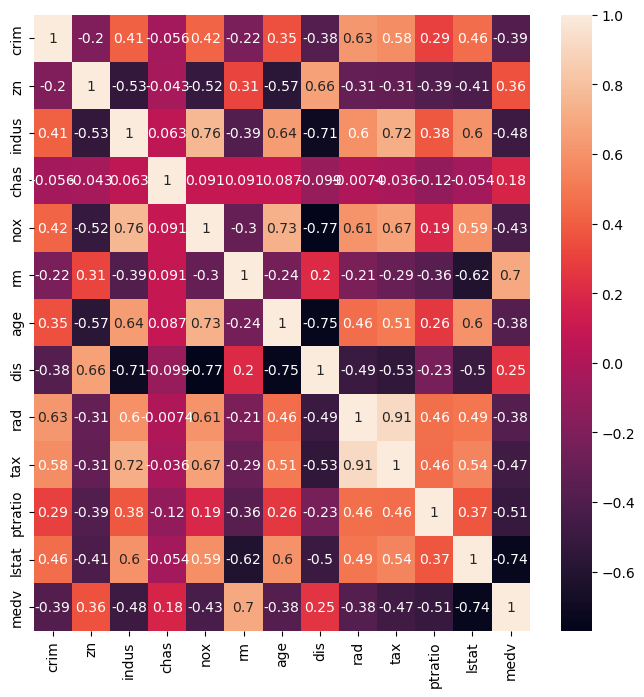

In [43]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Step - 3	Implement the Filter Method using correlation or chi-square tests to identify relevant features.

###### Using Correlation
The Filter Method involves using statistical techniques to select features. Correlation is used this for continuous data to understand linear or rank-based relationships between features and the target.

In [44]:
correlation = df.corr()['medv'].sort_values(ascending=True)

In [45]:
correlation_features = correlation[abs(correlation) > 0.1].keys()[:5]
correlation_features

Index(['lstat', 'ptratio', 'indus', 'tax', 'nox'], dtype='object')

###### Using Chi-Square Test
Chi-Square is used for categorical data after encoding it into numerical format. It's ideal for feature selection when both the features and the target are categorical.

In [46]:
label_encoder = LabelEncoder()
encoded_data = df.apply(label_encoder.fit_transform)

In [47]:
x = encoded_data.drop('medv', axis=1)
y = encoded_data['medv']

In [48]:
chi2_selector = SelectKBest(chi2)
X_chi2 = chi2_selector.fit_transform(x, y)

In [49]:
chi2_scores = chi2_selector.scores_
chi2_features = x.columns[chi2_scores > chi2_scores.mean()]

In [50]:
chi2_features

Index(['crim', 'rm', 'age', 'dis', 'lstat'], dtype='object')

### Step - 4	Implement the Wrapper Method using Recursive Feature Elimination (RFE) with a simple model like Logistic Regression.

Wrapper methods involve using a predictive model to evaluate the importance of features. RFE recursively removes the least important features based on model performance.

###### Recursive feature elimination
Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Unlike filtering and wrapper methods, RFE considers feature interactions. It offers robust performance in complex datasets but may be computationally demanding.

In [51]:
model = LogisticRegression(solver='saga')

In [52]:
rfe = RFE(model,n_features_to_select=5)
fit = rfe.fit(x,y)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

In [53]:
rfe_features = x.columns[fit.support_]
rfe_features

Index(['crim', 'rm', 'age', 'dis', 'lstat'], dtype='object')

### Step - 5	Implement the Embedded Method using a model with built-in feature importance (e.g., Random Forest).

Embedded methods perform feature selection as part of the model training process. Embedded methods “embed” the selection procedure in the training of the predictive model. The search for an optimal subset of features is built into the training of the classifier or the regression algorithm.

Hence, embedded methods train only one machine learning model to select features. Their computational cost equals the model training time. Random Forest can be used to get feature importances.

In [54]:
rf_model = RandomForestClassifier()
rf_model.fit(x, y)

RandomForestClassifier()

In [55]:
importances = rf_model.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [56]:
print("Feature Importances by Random Forest:")
print(importance_df)

Feature Importances by Random Forest:
    Feature  Importance
11    lstat    0.149331
5        rm    0.147383
0      crim    0.145185
6       age    0.136062
7       dis    0.132189
4       nox    0.080554
2     indus    0.051487
10  ptratio    0.047828
9       tax    0.045460
8       rad    0.032775
1        zn    0.021092
3      chas    0.010655


In [57]:
rf_features = importance_df[:5].Feature.values
rf_features

array(['lstat', 'rm', 'crim', 'age', 'dis'], dtype=object)

### Step - 6	Compare the selected features from all three methods and explain any differences.

###### To Summarize all the four methods we used:
- Correlation Method focuses on linear relationships.
- Chi-Square Method is used for categorical features and requires encoding.
- RFE is model-based, removing features recursively.
- Random Forest uses model-based importance, capturing complex relationships.

In [58]:
print("Features selected by Correlation:")
print(correlation_features.tolist())

print("\nFeatures selected by Chi-Square Test:")
print(chi2_features.tolist())

print("\nFeatures selected by RFE:")
print(rfe_features.tolist())

print("\nFeatures selected by Random Forest:")
print(rf_features.tolist())

Features selected by Correlation:
['lstat', 'ptratio', 'indus', 'tax', 'nox']

Features selected by Chi-Square Test:
['crim', 'rm', 'age', 'dis', 'lstat']

Features selected by RFE:
['crim', 'rm', 'age', 'dis', 'lstat']

Features selected by Random Forest:
['lstat', 'rm', 'crim', 'age', 'dis']


# Task 4: Implement Principal Component Analysis (PCA)

### Objective: Use PCA to reduce the dimensionality of a high-dimensional dataset and visualize the results.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Step - 1	Load a high-dimensional dataset (e.g., a dataset with 20+ features, such as the Wine dataset).

In [60]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [62]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [63]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [64]:
x = df.drop('Outcome', axis=1) 
y = df['Outcome'] 

### Step - 2	Normalize the data using Z-Score Normalization.

In [65]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(x)

### Step - 3	Implement PCA to reduce the dataset to 2 or 3 principal components.

###### Principal Component Analysis:
Principal Component Analysis (PCA) is a dimensionality reduction technique used in data analysis and machine learning. It transforms high-dimensional data into a lower-dimensional form while preserving as much variability as possible.

###### Steps in PCA:
- Standardize the Data
- Compute the Covariance Matrix
- Calculate Eigenvalues and Eigenvectors
- Sort and Select Principal Components
- Transform the Data

In [66]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_normalized)

In [67]:
result = pd.DataFrame(
    pca_result,
    columns=['Principal Component 1','Principal Component 2']
)

In [68]:
result.head()

,Principal Component 1,Principal Component 2
0,1.068503,1.234895
1,-1.121683,-0.733852
2,-0.396477,1.595876
3,-1.115781,-1.271241
4,2.359334,-2.184819


### Step - 4	Visualize the reduced dataset in 2D or 3D, using scatter plots to observe any patterns or clusters.

In [69]:
result['Outcome'] = y.values

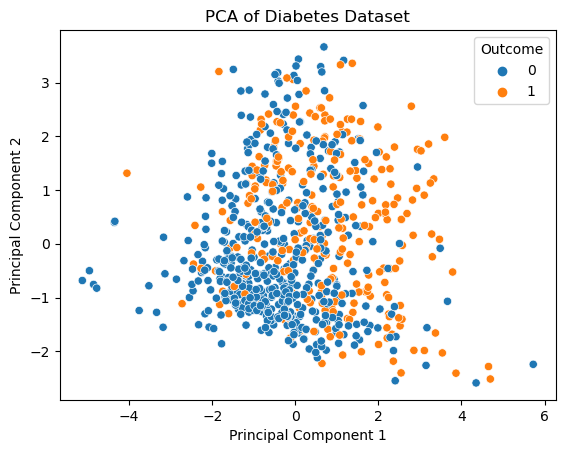

In [70]:
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Outcome', data=result)
plt.title('PCA of Diabetes Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Outcome')
plt.show()

### Step - 5	Calculate the explained variance ratio for each principal component.

In [71]:
variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for each Principal Component are",
      variance_ratio[0],'and',variance_ratio[1])

Explained Variance Ratio for each Principal Component are 0.2617974931611008 and 0.2164012675774649


### Step - 6	Analyze how much of the total variance is captured by the first few principal components.

In [72]:
cumulative_variance = variance_ratio.cumsum()
print("Cumulative Variance Captured are",cumulative_variance[0],'and',cumulative_variance[1])

Cumulative Variance Captured are 0.2617974931611008 and 0.4781987607385657
